## Ejercicios de pair programming 15 diciembre: Visualizacion I. Matplotlib1


In [1]:
#Importamos las librerias
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Cargamos el dataset
df_tiburon = pd.read_csv("files/tiburon.csv")
df_tiburon.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


Tendréis que realizar gráficas para contestar a las siguientes preguntas:

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [3]:
# Comprobamos la frecuencia de cada categoría
df_tiburon["sex_"].value_counts()

M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

In [4]:
# Después de comprobar que las categorías "M ", "N", "lli" y "." corresponden a Male, les modificamos el nombre
df_tiburon["sex_"].replace(to_replace=["M ","N","lli","."],value= "M", inplace=True)

In [7]:
# Comprobamos cuantos nulos hay 
df_tiburon["sex_"].isnull().sum()

550

In [9]:
# Creamos el DF nuevo en el que no estén los nulos de la columna sex_
df_porsexos = df_tiburon[df_tiburon["sex_"].notnull()]
df_porsexos.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [6]:
# Comprobamos
df_porsexos["sex_"].isnull().sum()

0

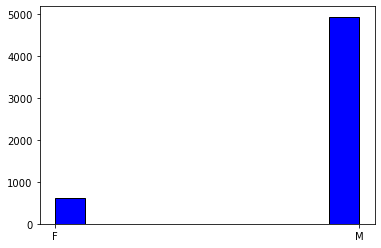

In [16]:
# Creamos la gráfica que compare el número de ataques por sexo
plt.figure()

plt.hist(x = df_porsexos["sex_"], facecolor  = 'blue', edgecolor = "black" )

plt.show() 

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. 

    Para eso tendréis que usar el parámetro autopct,

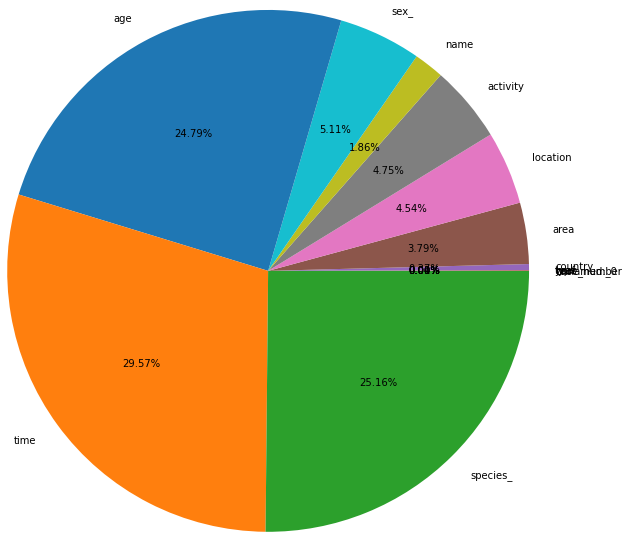

In [8]:
# iniciamos la figura
plt.figure()

# establecemos la gráfica que queremos. En este caso querremos visualizar la anchura del pétalo para cada especie. 
plt.pie(df_tiburon.isnull().sum(), labels=df_tiburon.columns, autopct = '%1.2f%%' , radius= 3)

#mostramos al gráfica
plt.show()

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [9]:
# Miramos que tipo de datos tenemos en las columnas
df_tiburon.dtypes

case_number     object
unnamed:_0       int64
year           float64
type            object
country         object
area            object
location        object
activity        object
name            object
sex_            object
age             object
time            object
species_        object
href            object
dtype: object

In [10]:
# Creamos un DF nuevo en el que hemos eliminado las columnas que no son categóricas
df_tiburon_obj = df_tiburon.drop(["unnamed:_0", "year"], axis = 1)
df_tiburon_obj.head(2)

,case_number,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [11]:
# Comprobamos de nuevo
df_tiburon_obj.dtypes

case_number    object
type           object
country        object
area           object
location       object
activity       object
name           object
sex_           object
age            object
time           object
species_       object
href           object
dtype: object

In [12]:
# Creamos una variable con los nombres de las columnas en forma de lista, para usarlo como etiquetas del eje
x= list(df_tiburon_obj.columns)
print(x)

['case_number', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'time', 'species_', 'href']


In [13]:
# Creamos una lista con el recuento de los valores únicos que hay en cada variable
lista = []
for i in df_tiburon_obj.columns:
    lista.append(df_tiburon_obj[i].value_counts().count())
lista

[6113, 8, 201, 791, 4020, 1484, 5118, 2, 156, 366, 1529, 6099]

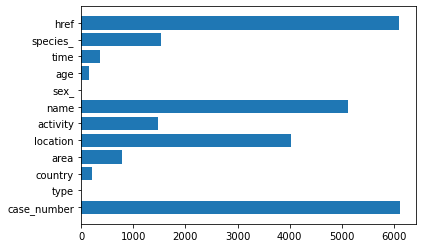

In [14]:
# Hacemos una gráfica horizontal porque si no los nombres de las columnas no se ven claramente
plt.figure()

plt.barh(df_tiburon_obj.columns, lista)

plt.show()

4. Filtrad los datos para quedarnos solo con los datos de USA.

    ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [17]:
# Creamos un DF con los ataques en USA
df_tiburon_USA = df_tiburon[df_tiburon["country"]=="USA"]
df_tiburon_USA.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [18]:
df_tiburon_USA.shape
# Ha habido 2200

(2200, 14)

In [20]:
# Creamos un DF con los ataques en USA ocurridos después del año 2000
df_tiburon_USA_2000 = df_tiburon_USA[df_tiburon_USA["year"]>=2000]
df_tiburon_USA_2000.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [21]:
df_tiburon_USA_2000.shape
# Ha habido 1011 ataques

(1011, 14)

En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [36]:
# Creamos un DF con la suma de los ataques en USA por tipo
dfy = pd.DataFrame(df_tiburon_USA_2000.type.value_counts())
dfy.reset_index(inplace=True)

In [37]:
dfy

,index,type
0,Unprovoked,843
1,Invalid,68
2,Provoked,61
3,Boating,32
4,Boat,5
5,Sea Disaster,2


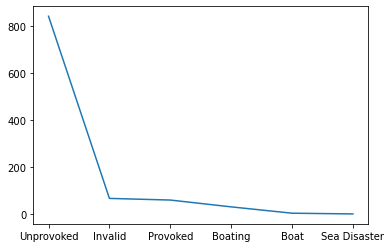

In [46]:
# Creamos una gráfica de barras que muestre los ataques en USA por tipo
plt.figure()
plt.plot(dfy["index"], dfy["type"])

plt.show()

5. Filtrad los datos para Spain:

    ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [43]:
# Hacemos un DF con los ataques ocurridos en Spain
df_tiburon_Spain = df_tiburon[df_tiburon["country"]=="SPAIN"]
df_tiburon_Spain.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,82,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,98,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


In [40]:
df_tiburon_Spain.shape
# Ha habido 42 ataques

(42, 14)

In [44]:
# Hacemos un DF con los ataques en España después del 2000
df_tiburon_Spain_2000 = df_tiburon_Spain[df_tiburon_Spain["year"]>=2000]
df_tiburon_Spain_2000.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,82,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,98,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [45]:
# Hacemos un DF con el recuento de ataques ocurridos en España despues del 2000 por tipo de ataque
dfy_Spain = pd.DataFrame(df_tiburon_Spain_2000.type.value_counts())
dfy_Spain.reset_index(inplace=True)

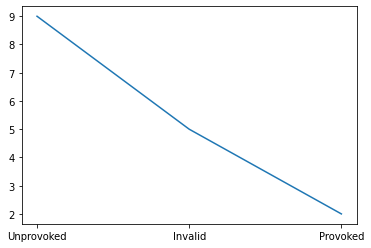

In [47]:
# Creamos la gráfica
plt.figure()
plt.plot(dfy_Spain["index"], dfy_Spain["type"])

plt.show()